In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parking = pd.read_excel(r'C:\Users\Payin\Downloads\parking.xls')

In [3]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [4]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [5]:
parking['Bldg Status'].unique()

array(['ACTIVE', 'DECOMMISSIONED', 'EXCESS'], dtype=object)

In [6]:
parking['Bldg Status'].value_counts(0)

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [7]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [8]:
parking['Owned/Leased'].value_counts()

LEASED    6940
OWNED     2120
Name: Owned/Leased, dtype: int64

In [9]:
parking.isnull().sum()

Bldg City               0
Bldg State              0
Bldg Status             0
Property Type           0
Total Parking Spaces    0
Owned/Leased            0
dtype: int64

In [10]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bldg City             9060 non-null   object
 1   Bldg State            9060 non-null   object
 2   Bldg Status           9060 non-null   object
 3   Property Type         9060 non-null   object
 4   Total Parking Spaces  9060 non-null   int64 
 5   Owned/Leased          9060 non-null   object
dtypes: int64(1), object(5)
memory usage: 424.8+ KB


In [11]:
parking.shape

(9060, 6)

### 1.What is the distribution of values for Owned/Leased to Total Parking Spaces

<BarContainer object of 9060 artists>

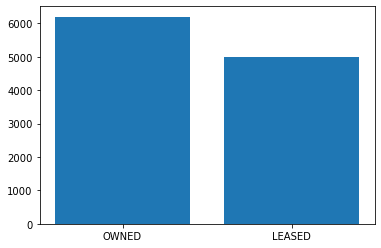

In [12]:
plt.bar(parking['Owned/Leased'], parking['Total Parking Spaces'])

In [13]:
owned_leased = pd.pivot_table(parking,index='Owned/Leased', values='Total Parking Spaces', aggfunc='count')

In [14]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


<AxesSubplot:xlabel='Owned/Leased'>

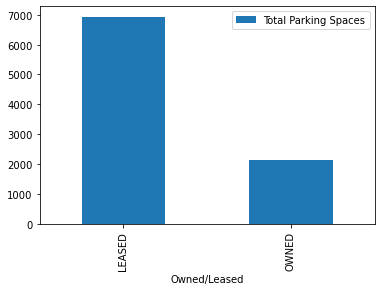

In [15]:
owned_leased.plot(kind='bar')

### 2.Which Bldg State has excess parking. Arrange in descending order

In [16]:
parking[parking['Bldg Status']=='EXCESS']

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
1809,MONTCLAIR,NJ,EXCESS,BUILDING,29,OWNED
1881,BUFFALO,NY,EXCESS,BUILDING,0,OWNED
1925,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED
1926,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED
1927,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED
...,...,...,...,...,...,...
7367,LAKEWOOD,CO,EXCESS,STRUCTURE,111,OWNED
7381,LAKEWOOD,CO,EXCESS,BUILDING,0,OWNED
7382,LAKEWOOD,CO,EXCESS,BUILDING,0,OWNED
7400,LAKEWOOD,CO,EXCESS,STRUCTURE,0,OWNED


In [17]:
excess_parking = pd.pivot_table(parking, index='Bldg State', columns='Bldg Status', values='Total Parking Spaces')

In [18]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [19]:
 excess_parking= excess_parking[excess_parking.EXCESS > 0]

In [20]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<AxesSubplot:xlabel='Bldg State'>

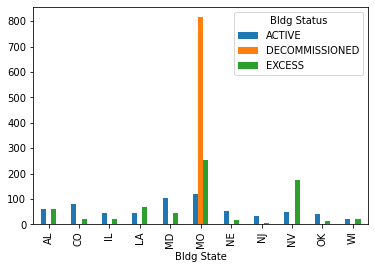

In [21]:
excess_parking.plot(kind='bar')

<AxesSubplot:xlabel='Bldg State'>

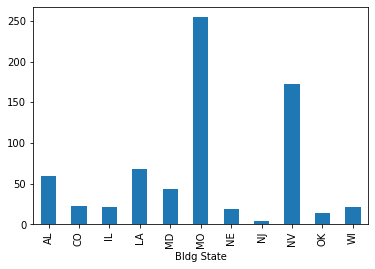

In [22]:
excess_parking['EXCESS'].plot(kind='bar')

In [23]:
excess_parking_sorted = excess_parking['EXCESS'].sort_values(ascending=False)

In [24]:
excess_parking_sorted

Bldg State
MO    254.272727
NV    173.000000
LA     68.666667
AL     59.000000
MD     43.166667
CO     22.200000
WI     22.000000
IL     21.000000
NE     19.000000
OK     14.000000
NJ      4.300000
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

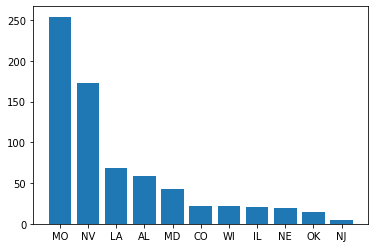

In [25]:
plt.bar(excess_parking_sorted.index,excess_parking_sorted.values)

### 3. Cities with Building Status as DECOMMISSIONED with its Total parking Spaces

In [26]:
parking[parking['Bldg Status'] == 'DECOMMISSIONED']

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [27]:
decommissioned_parking = pd.pivot_table(parking, index='Bldg City', columns='Bldg Status', values='Total Parking Spaces')

In [28]:
decommissioned_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg City,,,
ABERDEEN,35.909091,NaN,NaN
ABILENE,13.333333,NaN,NaN
ABINGDON,6.333333,NaN,NaN
ACCOMAC,25.000000,NaN,NaN
ADA,20.000000,NaN,NaN
...,...,...,...
YUCCA VALLEY,24.000000,NaN,NaN
YUMA,21.357143,NaN,NaN
ZANESVILLE,75.000000,NaN,NaN


In [29]:
decommissioned_parking_only = decommissioned_parking[decommissioned_parking['DECOMMISSIONED']> 0]

In [30]:
decommissioned_parking_only 

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg City,,,
OVERLAND,21.666667,2089.0,NaN
SAINT LOUIS,135.977273,178.5,NaN


In [31]:
d_parking = decommissioned_parking_only['DECOMMISSIONED'].sort_values(ascending=False)

In [32]:
d_parking

Bldg City
OVERLAND       2089.0
SAINT LOUIS     178.5
Name: DECOMMISSIONED, dtype: float64

<BarContainer object of 2 artists>

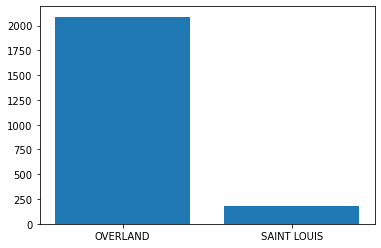

In [33]:
plt.bar(d_parking.index, d_parking.values)

### 4.Which Property type has parking space in excess

In [34]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [35]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [36]:
parking_ptype_excess = pd.pivot_table(parking[parking['Bldg Status']=='EXCESS'], index='Property Type', columns='Bldg Status', values='Total Parking Spaces')

In [37]:
parking_ptype_excess

Bldg Status,EXCESS
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


<BarContainer object of 2 artists>

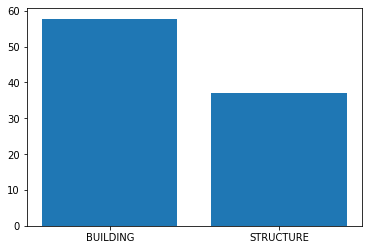

In [38]:
plt.bar(parking_ptype_excess.index, parking_ptype_excess.EXCESS)

### 5.Where can we find more active parking for Owned/Leased

In [39]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [40]:
active_parking = pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'], index='Owned/Leased', values='Total Parking Spaces')

In [41]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


<AxesSubplot:xlabel='Owned/Leased'>

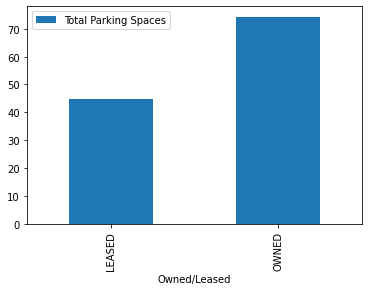

In [42]:
active_parking.plot(kind='bar')

In [43]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [44]:
active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [45]:
active_parking['park_space_perc'] = active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

In [46]:
active_parking

,Total Parking Spaces,park_space_perc
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


### 6.States with more Leased parking

In [47]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [48]:
leased_park_states = pd.pivot_table(parking[parking['Owned/Leased']=='LEASED'],index = 'Bldg State', values = 'Total Parking Spaces')

In [49]:
leased_park_states

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727
CT,26.134615
DC,42.562914
DE,15.592593
FL,49.102828


In [50]:
leased_park_states_sorted = leased_park_states['Total Parking Spaces'].sort_values(ascending=False)

In [51]:
leased_park_states_sorted

Bldg State
MO    107.762821
TX     73.457086
VA     72.476316
AL     64.055556
UT     62.505882
GA     62.425414
CO     58.647727
VT     56.128205
NM     51.926316
MD     51.461224
FL     49.102828
KS     48.242857
NE     45.239130
CA     44.639810
LA     42.666667
DC     42.562914
IL     41.822967
NV     40.086957
NH     39.029412
MA     38.774775
WA     38.453039
ID     38.092593
AZ     38.025806
MS     37.168831
KY     35.764228
OK     35.717949
TN     34.785185
MI     33.827225
IN     33.365385
NC     32.611111
NJ     30.475806
NY     29.940000
OH     29.783784
WV     29.466667
AR     28.098592
PA     27.440367
CT     26.134615
MN     25.833333
RI     25.750000
SC     24.625000
MT     24.064935
OR     23.340659
WI     22.982906
WY     20.102564
IA     19.941176
ME     17.448276
DE     15.592593
SD     14.868852
ND     10.477273
Name: Total Parking Spaces, dtype: float64

In [52]:
leased_park_states_sorted.head()

Bldg State
MO    107.762821
TX     73.457086
VA     72.476316
AL     64.055556
UT     62.505882
Name: Total Parking Spaces, dtype: float64

### 7.Which property type has more active parking

In [53]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [54]:
prop_type_active = pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'], index = 'Property Type', values = 'Total Parking Spaces', columns = 'Bldg Status')

In [55]:
prop_type_active

Bldg Status,ACTIVE
Property Type,
BUILDING,51.134764
LAND,19.268908
STRUCTURE,70.779762


In [56]:
prop_type_active_sorted =prop_type_active['ACTIVE'].sort_values(ascending=False)

In [57]:
prop_type_active_sorted

Property Type
STRUCTURE    70.779762
BUILDING     51.134764
LAND         19.268908
Name: ACTIVE, dtype: float64

<AxesSubplot:xlabel='Property Type'>

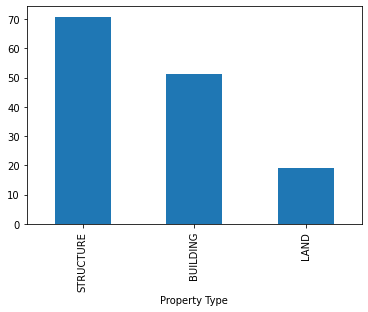

In [58]:
prop_type_active_sorted.plot(kind='bar')

### 8.How is the distribution of parking in city by property type

In [59]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [60]:
city_prop_type = pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'], index = 'Bldg City', values = 'Total Parking Spaces', columns = 'Property Type')

In [61]:
city_prop_type

Property Type,BUILDING,LAND,STRUCTURE
Bldg City,,,
ABERDEEN,35.909091,NaN,NaN
ABILENE,13.333333,NaN,NaN
ABINGDON,6.333333,NaN,NaN
ACCOMAC,25.000000,NaN,NaN
ADA,20.000000,NaN,NaN
...,...,...,...
YUCCA VALLEY,24.000000,NaN,NaN
YUMA,21.357143,NaN,NaN
ZANESVILLE,75.000000,NaN,NaN


In [62]:
 city_prop_type_clean = city_prop_type.fillna(0)

In [63]:
city_prop_type_clean

Property Type,BUILDING,LAND,STRUCTURE
Bldg City,,,
ABERDEEN,35.909091,0.0,0.0
ABILENE,13.333333,0.0,0.0
ABINGDON,6.333333,0.0,0.0
ACCOMAC,25.000000,0.0,0.0
ADA,20.000000,0.0,0.0
...,...,...,...
YUCCA VALLEY,24.000000,0.0,0.0
YUMA,21.357143,0.0,0.0
ZANESVILLE,75.000000,0.0,0.0


In [64]:
cptype_mean_sorted = city_prop_type_clean.mean().sort_values()

In [65]:
cptype_mean_sorted

Property Type
LAND          0.595098
STRUCTURE     5.599612
BUILDING     36.449587
dtype: float64

<AxesSubplot:xlabel='Property Type'>

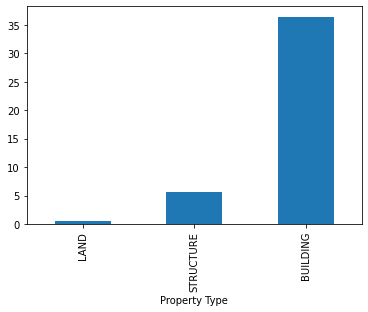

In [66]:
cptype_mean_sorted.plot(kind='bar')

### 9.Building States which has zero parking spaces

In [67]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [68]:
zero_parking = pd.pivot_table(parking[parking['Total Parking Spaces'] == 0], index = 'Bldg State', values = 'Total Parking Spaces') 

In [69]:
zero_parking

,Total Parking Spaces
Bldg State,
AL,0
AR,0
AZ,0
CA,0
CO,0
CT,0
DC,0
DE,0
FL,0


### 10.What are the states with the maximum and minimium parking spaces

In [70]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [71]:
states =  pd.pivot_table(parking, index='Bldg State', values='Total Parking Spaces')

In [72]:
states

,Total Parking Spaces
Bldg State,
AL,62.330645
AR,37.000000
AZ,32.256757
CA,60.493298
CO,77.764463
CT,29.327586
DC,41.255144
DE,15.750000
FL,51.905569


In [73]:
states_sorted = states['Total Parking Spaces'].sort_values(ascending = False)

In [74]:
states_sorted

Bldg State
MO    138.167464
MD    101.851117
UT     83.260417
CO     77.764463
GA     76.408257
VA     70.731818
AL     62.330645
CA     60.493298
MA     55.905512
KS     55.216216
TX     54.515801
TN     53.934211
NE     53.372549
FL     51.905569
NV     50.306667
KY     46.277372
NM     45.742647
IL     44.900415
LA     44.187919
WA     43.938017
MS     43.908046
NH     43.666667
MN     43.418367
MI     41.608511
DC     41.255144
IN     40.420382
OK     38.915385
ID     38.650794
OH     38.621891
NY     38.555858
PA     38.159184
AR     37.000000
SC     36.768421
NC     34.995283
VT     34.666667
AZ     32.256757
OR     31.828571
WV     31.320755
NJ     30.260274
CT     29.327586
IA     27.202703
WY     26.044444
RI     25.148148
WI     23.237705
SD     22.742424
ME     16.917526
DE     15.750000
MT     15.326667
ND     13.475000
Name: Total Parking Spaces, dtype: float64

In [75]:
states_sorted_max = states_sorted.head(1)

In [76]:
states_sorted_max

Bldg State
MO    138.167464
Name: Total Parking Spaces, dtype: float64

In [77]:
states_sorted_min = states_sorted.tail(1)

In [78]:
states_sorted_min

Bldg State
ND    13.475
Name: Total Parking Spaces, dtype: float64

In [79]:
states_sorted.idxmax(axis=1)

'MO'

In [80]:
states_sorted.idxmin()

'ND'